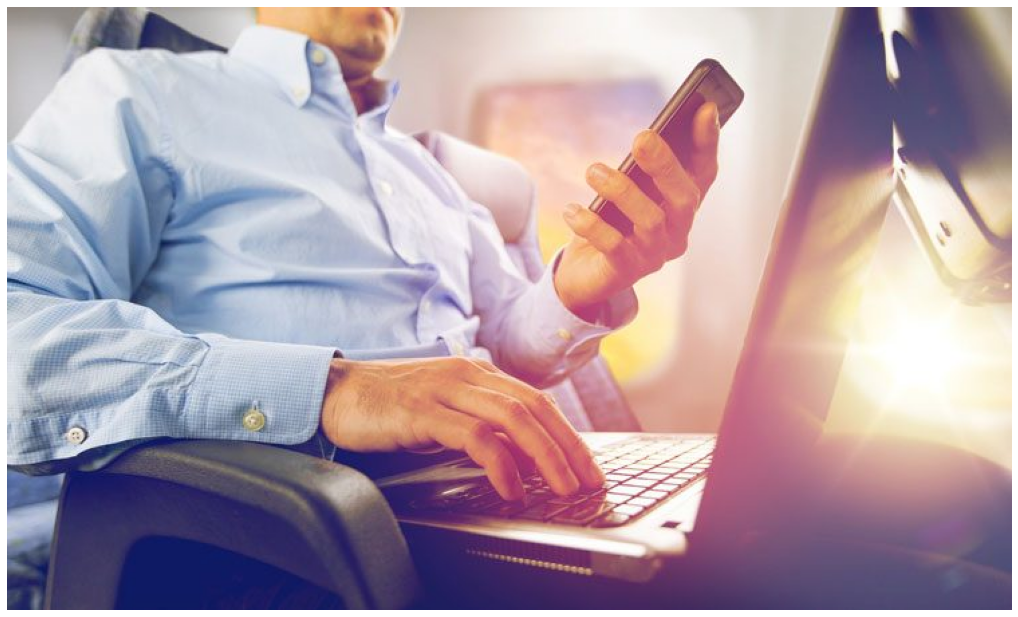

In [1]:
import imageio
import matplotlib.pyplot as plt
im = imageio.imread("passanger.png")
plt.figure(figsize=(18,15))
plt.axis("off")
plt.imshow(im)
plt.title("")
plt.show()

In [2]:
## ## importing moduels ## ##

import pandas as pd
import numpy as np


df = pd.read_csv("archive_final/passanger.csv")

In [3]:
## looking first 5 rows of data

df.head()

,Unnamed: 0,Unnamed: 0.1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
print("There are total {} pessanger".format(df.shape[0]))

There are total 129880 pessanger


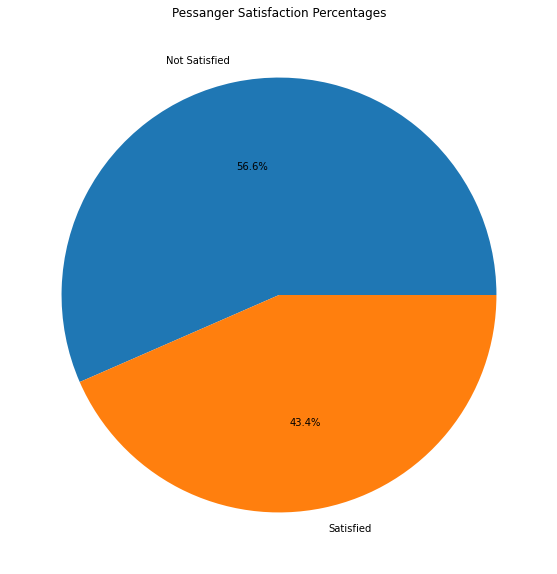

Out of 129880 pessangers 56428 are not satisfied


In [5]:
(satisfied, notSatisfied)=df.value_counts("satisfaction")

df.value_counts("satisfaction").plot(kind ='pie',autopct='%1.1f%%',
                                     labels =['Not Satisfied','Satisfied'],
                                     figsize=(10,10),
                                    title ="Pessanger Satisfaction Percentages")
plt.xlabel("")
plt.ylabel("")
plt.show()



print("Out of {} pessangers {} are not satisfied".format(df.shape[0],notSatisfied))

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

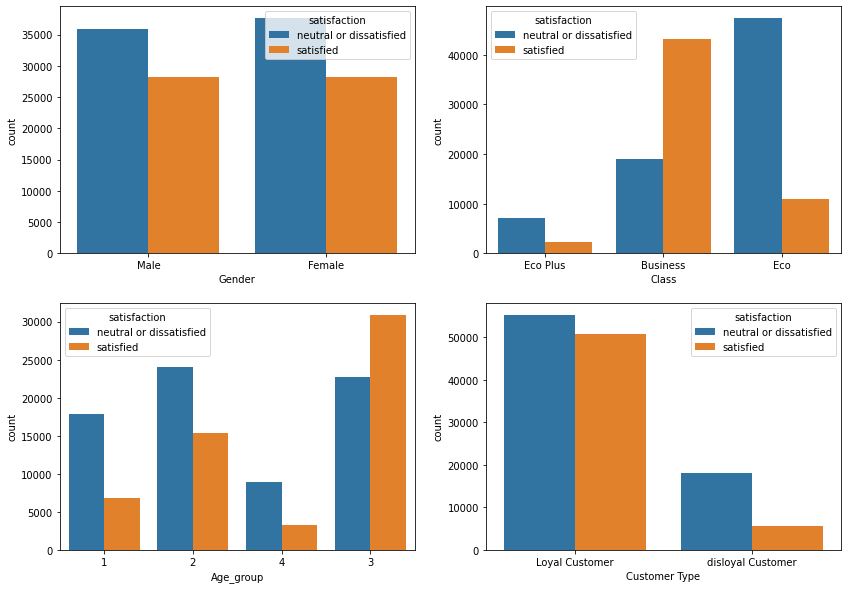

In [6]:
import seaborn as sns

figure, ax = plt.subplots(2,2, figsize =(14,10))

# How is pessanger satisfaction between Genders ?
sns.countplot(x ='Gender', data = df, hue ='satisfaction', ax =ax[0][0])

# How is pessanger satisfaction between Classes ?
sns.countplot(x ='Class', data = df, hue ='satisfaction', ax =ax[0][1])

def custom_age_bin(x):
    if x < 25 :
        return "1"
    elif x < 40:
        return "2"
    elif x < 60:
        return "3"
    else:
        return "4"

    
# How is pessanger satisfaction between Age Groups ?
df["Age_group"] = df['Age'].apply(custom_age_bin)


sns.countplot(x ='Age_group', data = df, hue ='satisfaction', ax =ax[1][0])

    
# How is pessanger satisfaction between Customer Types  ?
sns.countplot(x ='Customer Type', data = df, hue ='satisfaction', ax =ax[1][1])




<Figure size 1008x1008 with 0 Axes>

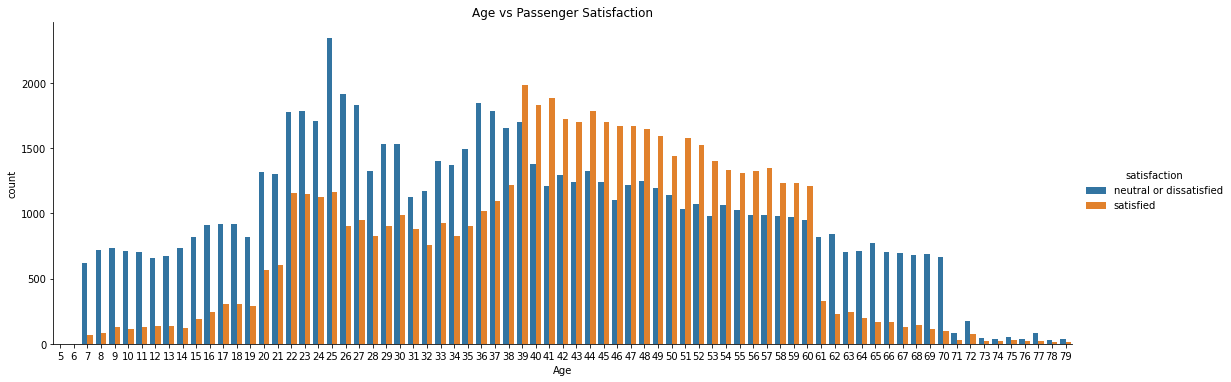

In [7]:
plt.figure(figsize =(14,14))

sns.axes_style('white')
sns.catplot(x = "Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
plt.title("Age vs Passenger Satisfaction")
plt.show()

In [8]:

### Checking null values. 


# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay in Minutes,393,0.003035
Unnamed: 0,0,0.000000
Online boarding,0,0.000000
satisfaction,0,0.000000
Departure Delay in Minutes,0,0.000000


In [9]:
# Filling na values by using interpolate linear method


df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].interpolate(method ='linear')


<AxesSubplot:xlabel='Inflight service', ylabel='satisfaction'>

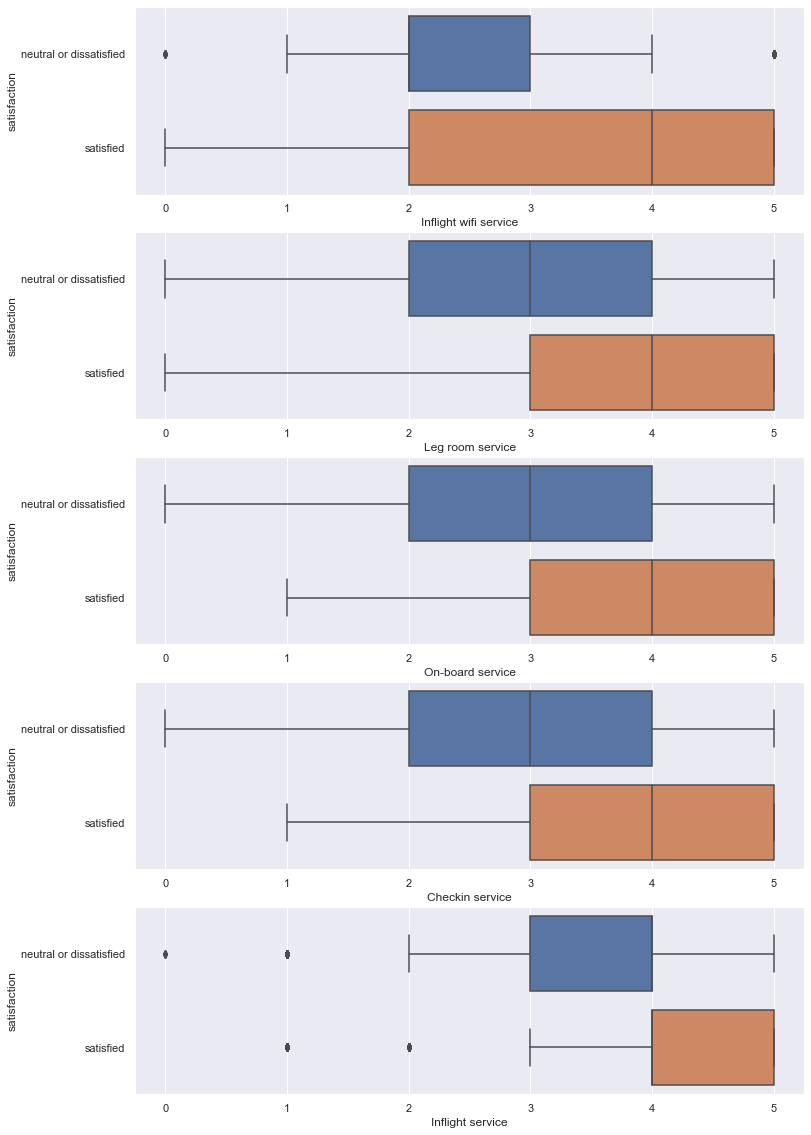

In [10]:


# How is the Pessanger Satisfaction distribution through Services

sns.set()

fig, ax = plt.subplots(nrows=5,ncols=1,figsize=(12,20))

sns.boxplot(y ='satisfaction',x ='Inflight wifi service', data= df, ax= ax[0])
sns.boxplot(y ='satisfaction',x ='Leg room service', data= df,ax=ax[1])
sns.boxplot(y ='satisfaction',x ='On-board service', data= df,ax=ax[2])
sns.boxplot(y ='satisfaction',x ='Checkin service', data= df,ax=ax[3])
sns.boxplot(y ='satisfaction',x ='Inflight service', data= df,ax=ax[4])

<Figure size 1008x1008 with 0 Axes>

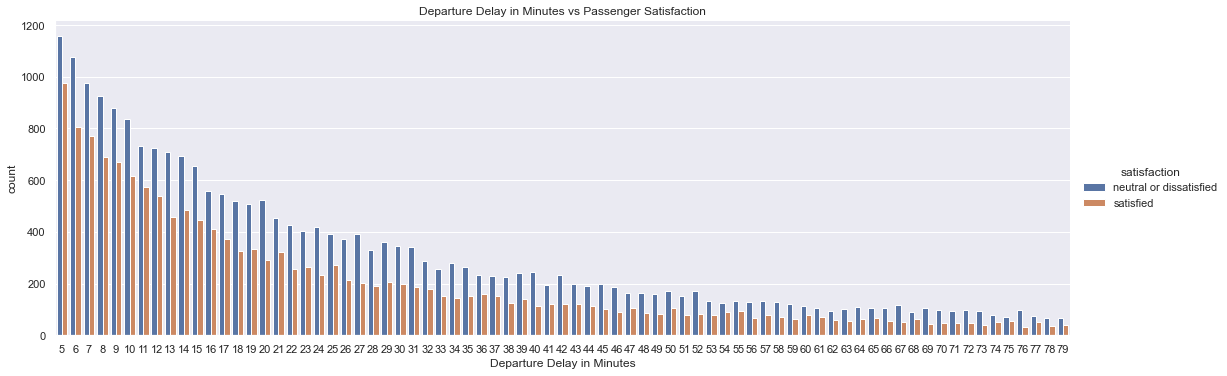

In [11]:
plt.figure(figsize =(14,14))

sns.axes_style('white')
sns.catplot(x = "Departure Delay in Minutes", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
plt.title("Departure Delay in Minutes vs Passenger Satisfaction")
plt.show()

<Figure size 1008x1008 with 0 Axes>

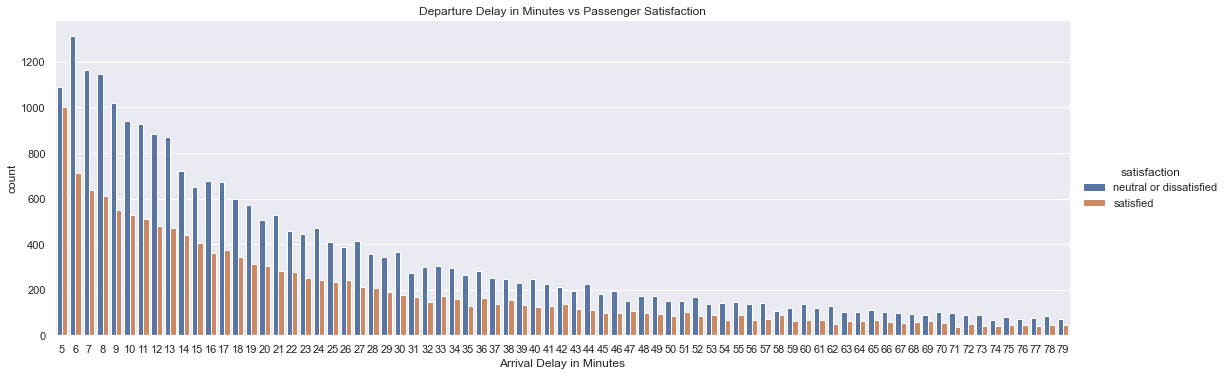

In [12]:
plt.figure(figsize =(14,14))

sns.axes_style('white')
sns.catplot(x = "Arrival Delay in Minutes", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
plt.title("Departure Delay in Minutes vs Passenger Satisfaction")
plt.show()

<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

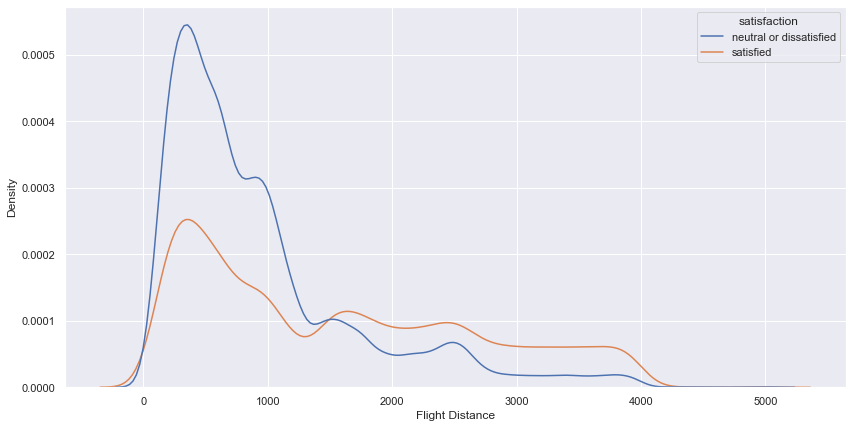

In [13]:

plt.figure(figsize =(14,7))

sns.kdeplot(data = df, x = 'Flight Distance',hue = 'satisfaction')

In [14]:

# Converting char, text string to numeric values


df['satisfaction'] = df['satisfaction'].replace({"satisfied":1,"neutral or dissatisfied":0 })
df['Gender'] = df['Gender'].replace({"Female":1,"Male":0 })
df['Customer Type'] = df['Customer Type'].replace({"Loyal Customer":1,"disloyal Customer":0 })
df['Type of Travel'] = df['Type of Travel'].replace({"Business travel":1,"Personal Travel":0 })
df['Class'] = df['Class'].replace({"Business":1,"Eco":0 ,"Eco Plus": 2 })

 


<AxesSubplot:xlabel='Leg room service', ylabel='satisfaction'>

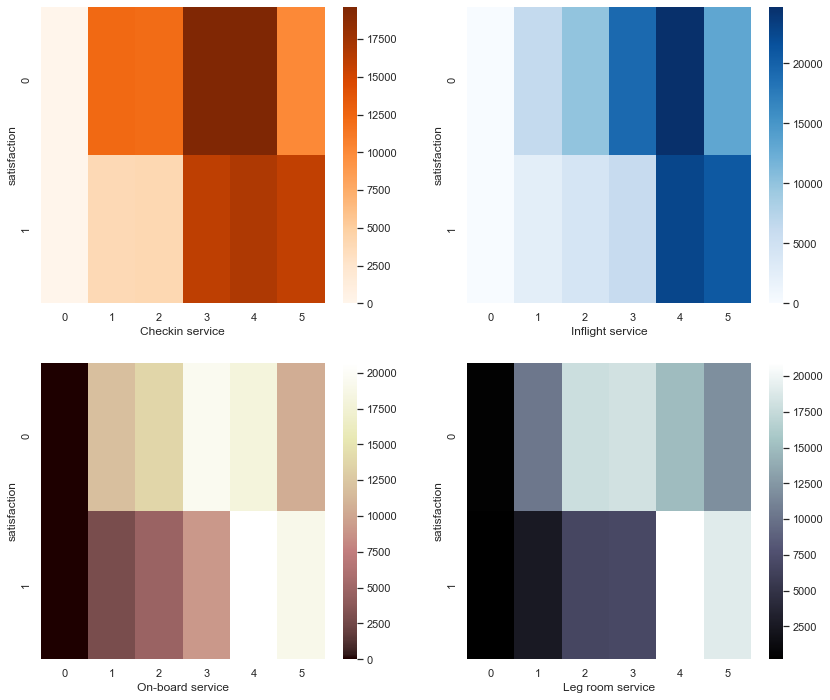

In [15]:
# Checking the correlation between satisfaction and "service " in [Checking Service, Inflight Servie, Onboard, legroom]

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

table1 = pd.crosstab(df['satisfaction'], df['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = ax[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = ax[0][1])
table3 = pd.crosstab(df['satisfaction'], df['On-board service'])
sns.heatmap(table3, cmap='pink', ax = ax[1][0])
table4 = pd.crosstab(df['satisfaction'], df['Leg room service'])
sns.heatmap(table4, cmap='bone', ax = ax[1][1])

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

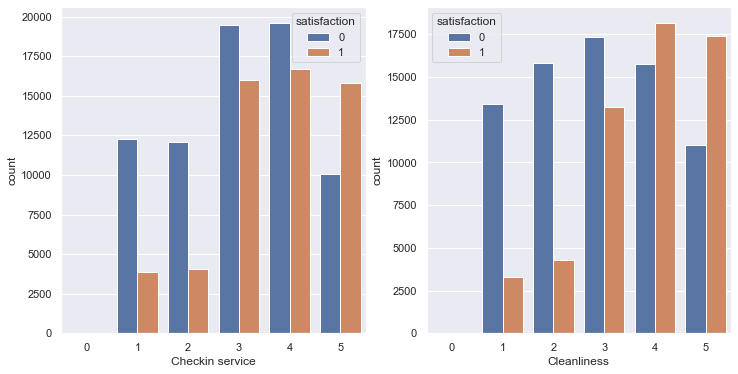

In [16]:
# Is there significant role among  Checking Service rate or Cleanliness and Pessanger Satisfaction



figure, ax = plt.subplots(1,2, figsize =(12,6))
sns.countplot(x = "Checkin service", data = df , hue ='satisfaction', ax =ax[0])
sns.countplot(x = "Cleanliness", data = df , hue ='satisfaction', ax =ax[1])

In [17]:
df['Before Flight Service'] = (df['On-board service'] + df['Checkin service'] + df['Online boarding'] + df['Ease of Online booking'])/ 4

df['On Flight Service'] =(df ['Inflight wifi service'] + df['Food and drink'] + df['Seat comfort'] + 
                        df['Inflight entertainment'] + df['Leg room service'] + df['Inflight service'] +
                         df['Cleanliness'])  / 7
df['After Flight Service'] = df['Baggage handling']

# Feature Selection

In [18]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.25)



/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Departure Delay in Minutes'>

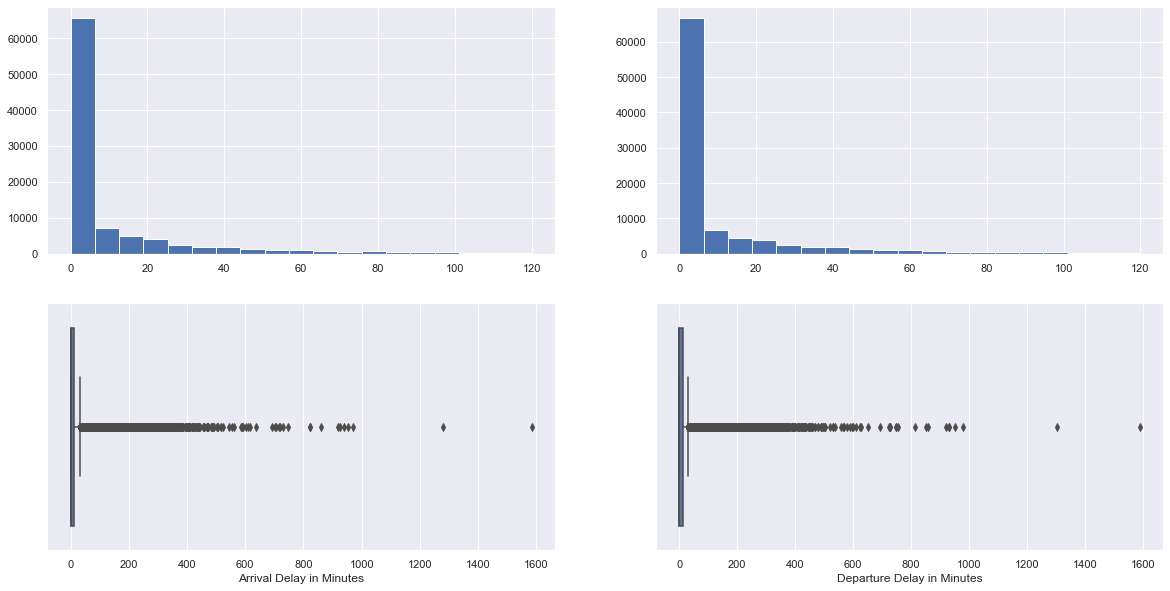

In [19]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0][0].hist(train['Arrival Delay in Minutes'],bins =np.linspace(0,120,20) )

ax[0][1].hist(train['Departure Delay in Minutes'],bins =np.linspace(0,120,20))


sns.boxplot(train['Arrival Delay in Minutes'] , ax= ax[1][0])
sns.boxplot(train['Departure Delay in Minutes'],ax= ax[1][1])

In [20]:
#Taking Care of outliners


from scipy import stats

z = np.abs(stats.zscore(train['Arrival Delay in Minutes']))


threshold = 3
condition  = z <3

train =train[condition]


z = np.abs(stats.zscore(train['Departure Delay in Minutes']))
threshold = 3
condition  = z < 3

train =train[condition] 

In [21]:
training_feaures = ['Gender',"Customer Type","Age_group","Type of Travel",
            "Class","Before Flight Service",'On Flight Service',"After Flight Service",'satisfaction']

train = train[training_feaures]


In [22]:
train.describe()

,Gender,Customer Type,Type of Travel,Class,Before Flight Service,On Flight Service,After Flight Service,satisfaction
count,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000
mean,0.508478,0.817618,0.689823,0.625293,3.178978,3.290352,3.631183,0.437616
std,0.499931,0.386161,0.462568,0.617237,0.820616,0.825323,1.182596,0.496096
min,0.000000,0.000000,0.000000,0.000000,0.500000,0.857143,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,2.500000,2.714286,3.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,3.250000,3.428571,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,3.750000,4.000000,5.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,1.000000


<AxesSubplot:>

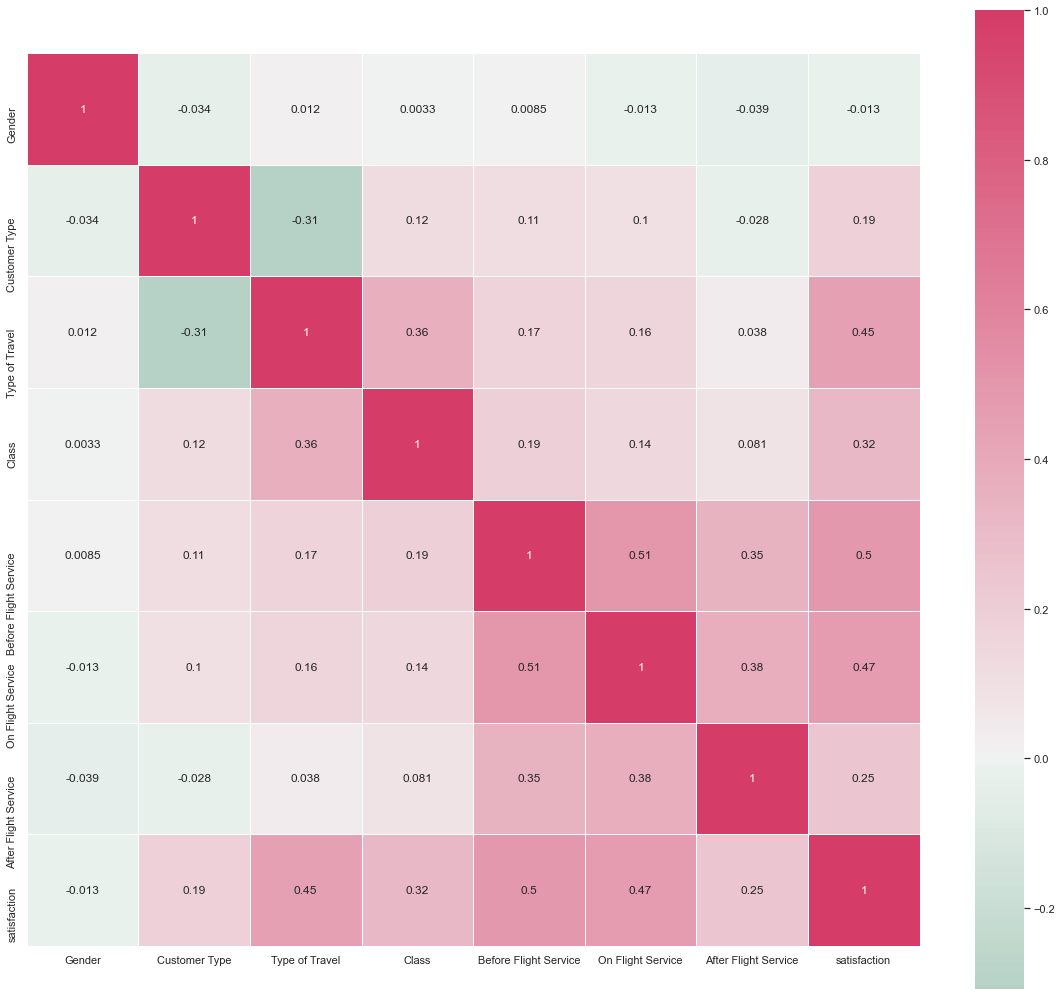

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

# Feature Selection through Chi-Square

In [24]:
from sklearn.feature_selection import SelectKBest, chi2
X_train = train.loc[:,train.columns!='satisfaction']
y_train = train[['satisfaction']]
selector = SelectKBest(chi2, k=6)
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)
print(X_train.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Before Flight Service',
       'On Flight Service', 'After Flight Service'],
      dtype='object')


# Feature Selection Logistic

In [25]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(penalty='l1',C = 10.0, max_iter = 100, solver='liblinear')

model_logistic.fit(X_train,y_train)


pd.DataFrame(index =range(0,1),data =dict(zip(X_train.columns, model_logistic.coef_[0])), columns=X_train.columns )


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Gender,Customer Type,Age_group,Type of Travel,Class,Before Flight Service,On Flight Service,After Flight Service
0,-0.05168,2.12052,-0.092779,3.185612,0.224154,1.22088,0.913886,0.189782


In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf



params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 50,
             'random_state': 12345}

selector = SelectFromModel(rf(**params_rf))
selector.fit(X_train, y_train)
support = selector.get_support()
features = X_train.loc[:,support].columns.tolist()

print(features)
print(rf(n_estimators=100, random_state=0).fit(X_train,y_train).feature_importances_)






/usr/local/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


['Type of Travel', 'Class', 'Before Flight Service', 'On Flight Service']


<ipython-input-26-bebf16ac8a2e>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  print(rf(n_estimators=100, random_state=0).fit(X_train,y_train).feature_importances_)


[0.01086109 0.06979294 0.04692172 0.17165635 0.12610524 0.24763987
 0.24803795 0.07898483]


# Normalize

In [27]:
features = ['Type of Travel', 'Class', 'Before Flight Service', 'On Flight Service','Customer Type',"After Flight Service"]
X_train = X_train[features]
y_train =train['satisfaction']

X_test = test[features]
y_test = test['satisfaction']


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# PARAMS UPDATED BY USING GRIDSEARCHCV

In [31]:


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier



#############################################

## params updata ##
#############################################


logistic_params = {'penalty': "none","C": 0.0263,'solver': 'sag','max_iter':10
}

model_logistic = LogisticRegression()

############################################

knn_params  = {'n_neighbors':15,'weights':'uniform', 'algorithm': 'kd_tree', 'n_jobs':4}
model_knn = KNeighborsClassifier(**knn_params)

##############################################


params_rf = {'max_depth': 7,
             'min_samples_leaf': 2,
             'min_samples_split': 4,
             'n_estimators': 50,
             'random_state': 12345}
model_random_forest = RandomForestClassifier(**params_rf)
#########################################


model_gaussionnb = GaussianNB()

#########################################
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 50}

model_mlpClassifier = MLPClassifier(**params_nn)

###################################################

params_adab ={'n_estimators': 50,
              'random_state': 12345}

model_ada = AdaBoostClassifier(**params_adab)

###################################################

import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)


vote = VotingClassifier( estimators=[('logit', model_logistic), ('knn',model_knn),
                                    ('gnb', model_gaussionnb),('rf', model_random_forest),
                                    ('mlp',model_mlpClassifier),('ada',model_ada),
                                    ('xgb',model_xgb)],
                        voting='soft')
vote.fit(X_train_scaled, y_train)


y_pred = (vote.predict(X_test_scaled))

















/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

[01:58:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.8796427471512165
ROC Area under Curve = 0.8732853818089841
Time taken = 41.53190493583679
              precision    recall  f1-score   support

           0    0.87067   0.92351   0.89631     18290
           1    0.89296   0.82306   0.85659     14180

    accuracy                        0.87964     32470
   macro avg    0.88182   0.87329   0.87645     32470
weighted avg    0.88040   0.87964   0.87896     32470



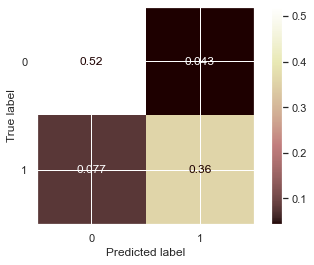

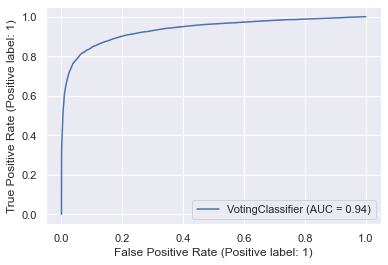

In [33]:
import warnings
warnings.filterwarnings("ignore")

model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(vote, X_train, y_train, X_test, y_test)

In [35]:
features = ['Type of Travel', 'Class', 'Before Flight Service', 'On Flight Service','Customer Type',"After Flight Service"]
unsatisfied_pessangers = df.loc[df['satisfaction'] ==0,features]



In [36]:
"""If Airlines works on BEfore Flight Service and On Flihgt Service , 
lets say goal is to increase 50 percent service    20 10 
"""
import math
def service_increase(df, col, col_multiplier,col2,col2_multiplier):
    df2 = df.copy(deep=True)
    df2[col] = df2[col] * (1+col2_multiplier/100)    
    df2[col2] = df2[col2] * (1+col2_multiplier/100)
    preds  = vote.predict(df2)
    n_will_satisfied= preds.sum()
    print("""There are total {} unsatisfied Pessangers and increase {}% on {}
    and increase {}% on {}  will bring {} happy Pessangers  which is almost {}% increase on Unhappy Pessangers
    """.format(len(preds),col_multiplier, col, col2_multiplier,
               col2 ,n_will_satisfied,math.ceil(n_will_satisfied*100 /len(preds))))
    
    
    
    

In [37]:
service_increase(unsatisfied_pessangers,'Before Flight Service',10,'On Flight Service',10)

There are total 73452 unsatisfied Pessangers and increase 10% on Before Flight Service
    and increase 10% on On Flight Service  will bring 11699 happy Pessangers  which is almost 16% increase on Unhappy Pessangers
    
